In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
import pandas as pd

In [2]:
random_samples = pd.DataFrame(np.random.normal(size=(100000,), scale=0.15))

<IPython.core.display.Javascript object>


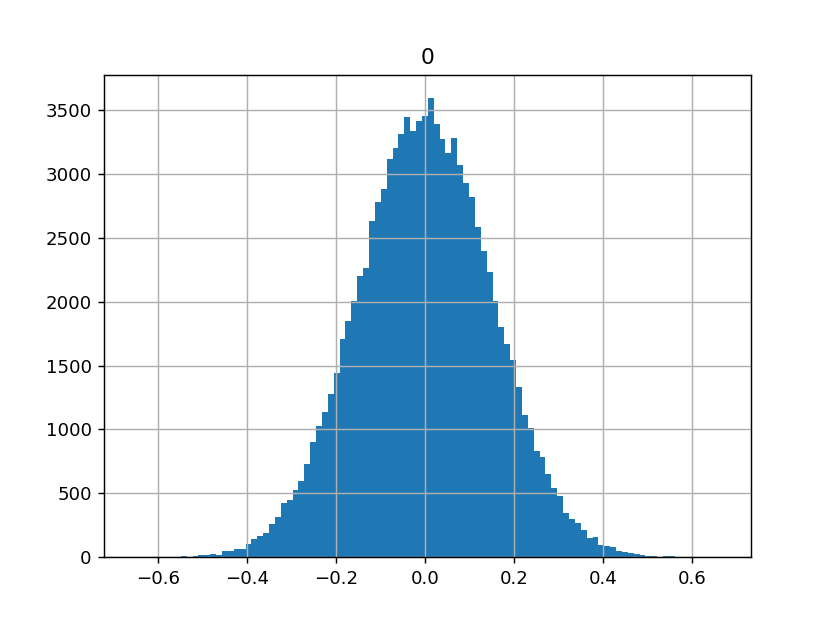

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e35da58d0>]],
      dtype=object)

In [12]:
random_samples.hist(bins=100)

<IPython.core.display.Javascript object>


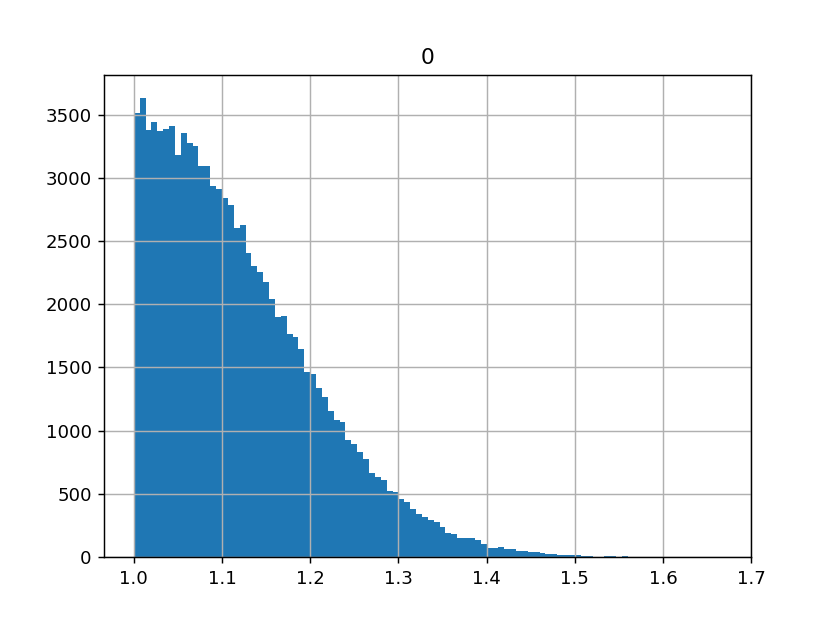

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e2c1fdb10>]],
      dtype=object)

In [14]:
(abs(random_samples)+1).hist(bins=100)

In [11]:
(abs(a)+1).describe()

,0
count,100000.000000
mean,1.120069
std,0.090679
min,1.000012
25%,1.047881
50%,1.101439
75%,1.172851
max,1.680888


In [74]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

from desdeo_problem.Variable import variable_builder
from desdeo_problem.Objective import _ScalarObjective, VectorObjective
from desdeo_problem.Problem import MOProblem
from desdeo_problem.testproblems.TestProblems import test_problem_builder

from desdeo_emo.EAs.NSGAIII import NSGAIII
from desdeo_emo.EAs.RVEA import RVEA
import plotly.express as ex
from pygmo import fast_non_dominated_sorting as nds

In [56]:
problem = test_problem_builder(name="WFG1", n_of_variables=30, n_of_objectives=4)

ProblemError: Specified Problem not yet supported.
 The supported problems are:dict_keys(['ZDT1', 'ZDT2', 'ZDT3', 'ZDT4', 'ZDT5', 'ZDT6', 'DTLZ1', 'DTLZ2', 'DTLZ3', 'DTLZ4', 'DTLZ5', 'DTLZ6', 'DTLZ7'])

In [110]:
evolver = RVEA(problem, n_iterations=5, n_gen_per_iter=400)

In [111]:
while evolver.continue_evolution():
    evolver.iterate()

In [112]:
t = evolver.population.objectives[nds(evolver.population.objectives)[0][0]].max(axis=0)

In [81]:
evolver.population.objectives.max(axis=0)

array([2.2448892 , 4.26106636, 6.42347351])

In [48]:
(2**(1/2))**3

2.8284271247461907

In [88]:
t/t.min()

array([1.        , 2.10014021, 3.15402707])

In [113]:
t

array([1.90132776, 4.23450048, 6.41445835])

In [1]:
from optproblems import wfg,dtlz

In [5]:
obj_func = wfg.WFG1(num_objectives=6, num_variables=12,k=4)

AssertionError: 

In [65]:
def modified_obj_func(x):
    if isinstance(x, list):
        if len(x) == n_of_variables:
            return [obj_func(x)]
        elif len(x[0]) == n_of_variables:
            return list(map(obj_func, x))
    else:
        if x.ndim == 1:
            return [obj_func(x)]
        elif x.ndim == 2:
            return list(map(obj_func, x))
    raise TypeError("Unforseen problem, contact developer")

In [109]:
var_names = ["x" + str(i + 1) for i in range(12)]
obj_names = ["f" + str(i + 1) for i in range(3)]
variables = variable_builder(
        names=var_names,
        initial_values=obj_func.min_bounds,
        lower_bounds=obj_func.min_bounds,
        upper_bounds=obj_func.max_bounds,
    )
objective = VectorObjective(name=obj_names, evaluator=modified_obj_func)
problem = MOProblem([objective], variables, None)

In [114]:
obj_func.max_bounds

[2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0]

In [103]:
import numpy as np

In [119]:
(abs(np.random.normal(size=3, scale=0.15)) + 1)*[2,4,6]

array([2.32033122, 4.80781701, 7.70502665])

In [115]:
obj_func.min_objectives

[0.0, 0.0, 0.0]